In [13]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [14]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Class', axis=1)

In [18]:
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [20]:
lr = LogisticRegression(max_iter=2000)

In [21]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred)

In [24]:
report = classification_report(y_test, y_pred, digits=4)

In [25]:
prec = precision_score(y_test, y_pred)

In [26]:
recall = recall_score(y_test, y_pred)

In [38]:
f1 = f1_score(y_test, y_pred)

TypeError: 'float' object is not callable

In [40]:
f1_score = f1_score(y_test, y_pred)

TypeError: 'float' object is not callable

In [27]:
from sklearn.metrics import matthews_corrcoef

mcc_lr = matthews_corrcoef(y_test, y_pred)
print("Logistic Regression MCC:", mcc_lr)

Logistic Regression MCC: 0.734457176313651


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [28]:
f1 = f1_score(y_test, y_pred)

In [29]:
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[56852    12]
 [   35    63]]


In [30]:
print("\nClassification report:\n", report)


Classification report:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8400    0.6429    0.7283        98

    accuracy                         0.9992     56962
   macro avg     0.9197    0.8213    0.8640     56962
weighted avg     0.9991    0.9992    0.9991     56962



In [31]:
print(f"Precision: {prec:.4f}  Recall: {recall:.4f}  F1: {f1:.4f}")

Precision: 0.8400  Recall: 0.6429  F1: 0.7283


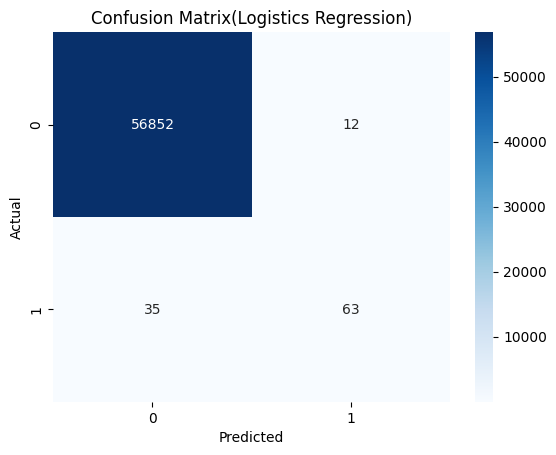

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Logistics Regression)')
plt.show()

In [33]:
lr_balanced = LogisticRegression(class_weight='balanced', max_iter=2000)
lr_balanced.fit(X_train, y_train)
y_pred_bal = lr_balanced.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.metrics import classification_report
print("Balanced LR report:\n", classification_report(y_test, y_pred_bal, digits=4))

Balanced LR report:
               precision    recall  f1-score   support

           0     0.9999    0.9754    0.9875     56864
           1     0.0605    0.9184    0.1136        98

    accuracy                         0.9753     56962
   macro avg     0.5302    0.9469    0.5505     56962
weighted avg     0.9982    0.9753    0.9860     56962



In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [37]:
print("RandomForest report:\n", classification_report(y_test, y_pred_rf, digits=4))

RandomForest report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [38]:
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)
print("Random Forest MCC:", mcc_rf)

Random Forest MCC: 0.8516532279164988


In [39]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred, digits=4))

Logistic Regression Report:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8400    0.6429    0.7283        98

    accuracy                         0.9992     56962
   macro avg     0.9197    0.8213    0.8640     56962
weighted avg     0.9991    0.9992    0.9991     56962



In [40]:
print("Logistic Regression MCC:", matthews_corrcoef(y_test, y_pred))


Logistic Regression MCC: 0.734457176313651


In [41]:
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, digits=4))


Random Forest Report:
               precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9610    0.7551    0.8457        98

    accuracy                         0.9995     56962
   macro avg     0.9803    0.8775    0.9227     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [42]:
print("Random Forest MCC:", matthews_corrcoef(y_test, y_pred_rf))

Random Forest MCC: 0.8516532279164988
